In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_context('talk')
np.set_printoptions(suppress=True) 
    ### not xEyy format(science float format)
%matplotlib inline  

In [2]:
import scipy.io
data = scipy.io.loadmat('ex6data1.mat')
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [36]:
X = data['X']
y = data['y']
# disp = np.append(X, y, axis=1)
# print disp

In [37]:
def plotData(X, y):
    plt.plot(
        X[np.where(y==0)[0],0], X[np.where(y==0)[0], 1], 'b*');
    plt.plot(
        X[np.where(y==1)[0],0], X[np.where(y==1)[0], 1], 'r.');

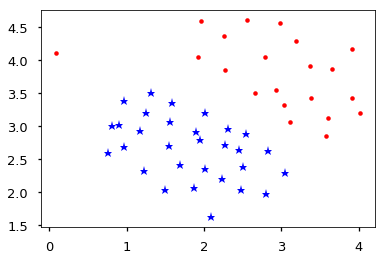

In [38]:
plotData(X, y)